In [1]:
import numpy as np

# matplotlib
# ライブラリーのインポート
import matplotlib.pyplot as plt
# インライン表示
%matplotlib inline

# 日本語フォント
import pylab
from matplotlib.font_manager import FontProperties
# 日本語フォント
fp = FontProperties(fname='C:\WINDOWS\Fonts\msgothic.ttc', size = 12)

## 付録D　R410Aにおける冷凍サイクルの理論効率

### D.4　冷凍サイクルの理論効率

<p style="text-indent:2em">暖房：</p> 
$$ 
\begin{equation*} 
    e_{ref,H,th} = \frac{h_{ref,comp,out} - h_{ref,cnd,out}}{h_{ref,comp,out} - h_{ref,comp,{\textit in}}}
\end{equation*} 
$$

<div style="text-align: right;"> (1-1) </div>

<p style="text-indent:2em">冷房：</p> 
$$ 
\begin{equation*} 
    e_{ref,C,th} = \frac{h_{ref,comp,{\textit in}} - h_{ref,evp,{\textit in}}}{h_{ref,comp,out} - h_{ref,comp,{\textit in}}} = \frac{h_{ref,comp,{\textit in}} - h_{ref,cnd,out}}{h_{ref,comp,out} - h_{ref,comp,{\textit in}}} 
\end{equation*} 
$$

<div style="text-align: right;"> (1-2) </div>

ここで、  

$e_{ref,C,th}$：冷房の理論効率(-)  
$e_{ref,H,th}$：暖房の理論効率(-)  
$h_{ref,evp,{\textit in}}$：蒸発器入口比エンタルピー(kJ/kg)  
$h_{ref,cnd,{\textit in}}$：凝縮器入口比エンタルピー(kJ/kg)  
$h_{ref,cnd,out}$：凝縮器出口比エンタルピー(kJ/kg)   
$h_{ref,comp,{\textit in}}$：圧縮機吸込比エンタルピー(kJ/kg)  
$h_{ref,comp,out}$：圧縮機吐出比エンタルピー(kJ/kg)   

である。

In [2]:
def e_ref_H_th(h_ref_comp_in, h_ref_comp_out, h_ref_cnd_out):
    '''暖房の理論効率(-)を求める。'''
    
    return (h_ref_comp_out - h_ref_cnd_out) / (h_ref_comp_out - h_ref_comp_in) 

In [3]:
def e_ref_C_th(h_ref_comp_in, h_ref_comp_out, h_ref_evp_in):
    '''冷房の理論効率(-)を求める。'''
    
    return (h_ref_comp_in - h_ref_evp_in) / (h_ref_comp_out - h_ref_comp_in) 

### D.5　圧縮機吐出及び吸込比エンタルピー

<p style="text-indent:2em">圧縮機吐出比エンタルピー：</p> 
$$ 
\begin{equation*} 
    h_{ref,comp,out} = f_{H,gas,comp,out} \left( P_{ref,comp,out}, \: S_{ref,comp,out} \right)
\end{equation*} 
$$

<div style="text-align: right;"> (2) </div>

ここで、  

$f_{H,gas,comp,out} $：圧縮機吐出領域における比エンタルピーを求める関数   
$h_{ref,comp,out}$：圧縮機吐出比エンタルピー(kJ/kg)  
$P_{ref,comp,out}$：圧縮機吐出圧力(MPa)  
$S_{ref,comp,out}$：圧縮機吐出比エントロピー(kJ/(kg・K))  

である。

In [4]:
def h_ref_comp_out(P_ref_comp_out, S_ref_comp_out):
    '''圧縮機吐出領域における比エンタルピー(kJ/kg)  を求める。'''
    
    return f_H_gas_comp_out(P_ref_comp_out, S_ref_comp_out)

<p style="text-indent:2em">圧縮機吐出圧力：</p> 
$$ 
\begin{equation*} 
    P_{ref,comp,out} = P_{ref,cnd}
\end{equation*} 
$$

<div style="text-align: right;"> (3) </div>

In [5]:
def P_ref_comp_out(P_ref_cnd):
    '''圧縮機吐出圧(MPa)を求める。'''
    
    return P_ref_cnd

ここで、  

$P_{ref,cnd}$：凝縮圧力(MPa)  
$P_{ref,comp,out}$：圧縮機吐出圧力(MPa)   

である。

<p style="text-indent:2em">圧縮機吐出比エントロピー：</p> 
$$ 
\begin{equation*} 
    S_{ref,comp,out} = S_{ref,comp,{\textit in}}
\end{equation*} 
$$

<div style="text-align: right;"> (4) </div>

In [6]:
def S_ref_comp_out(S_ref_comp_in):
    '''圧縮機吐出比エントロピー(kJ/(kg・K))を求める。'''
    
    return S_ref_comp_in

ここで、  

$S_{ref,comp,{\textit in}}$：圧縮機吸込比エントロピー(kJ/(kg・K))   
$S_{ref,comp,out}$：圧縮機吐出比エントロピー(kJ/(kg・K))   

である。

<p style="text-indent:2em">圧縮機吸込比エントロピー：</p> 
$$ 
\begin{equation*} 
    S_{ref,comp,{\textit in}} = f_{S,gas} \left( P_{ref,comp,{\textit in}} , \: h_{ref,comp,{\textit in}} \right)
\end{equation*} 
$$

<div style="text-align: right;"> (5) </div>

ここで、  

$f_{S,gas} $：飽和蒸気の圧力を求める関数   
$h_{ref,comp,{\textit in}}$：圧縮機吸込入比エンタルピー(kJ/kg)  
$P_{ref,comp,{\textit in}}$：圧縮機吸込圧力(MPa)   
$S_{ref,comp,{\textit in}}$：圧縮機吸込比エントロピー(kJ/(kg・K))   

である。

In [7]:
def S_ref_comp_in(P_ref_comp_in, h_ref_comp_in):
    '''圧縮機吸込比エントロピー(kJ/(kg・K))を求める。'''
    
    return f_S_gas(P_ref_comp_in, h_ref_comp_in)

<p style="text-indent:2em">圧縮機吸込比エンタルピー：</p> 
$$ 
\begin{equation*} 
    h_{ref,comp,{\textit in}} = f_{H,gas,comp,{\textit in}} \left( P_{ref,comp,{\textit in}} , \: \theta_{ref,comp,{\textit in}} \right)
\end{equation*} 
$$

<div style="text-align: right;"> (6) </div>

ここで、  

$f_{H,gas,comp,{\textit in}} $：圧縮機吸込領域における比エンタルピーを求める関数   
$h_{ref,comp,{\textit in}}$：圧縮機吸込比エンタルピー(kJ/kg)  
$P_{ref,comp,{\textit in}}$：圧縮機吸込圧力(MPa)   
$\theta_{ref,comp,{\textit in}}$：圧縮機吸込温度(℃)   

である。

In [8]:
def h_ref_comp_in(P_ref_comp_in, theta_ref_comp_in):
    '''圧縮機吸込比エンタルピー(kJ/kg)を求める。'''
    
    return f_H_gas_comp_in(P_ref_comp_in, theta_ref_comp_in)

<p style="text-indent:2em">圧縮機吐出圧力：</p> 
$$ 
\begin{equation*} 
    P_{ref,comp,{\textit in}} = P_{ref,evp}
\end{equation*} 
$$

<div style="text-align: right;"> (7) </div>

ここで、  

$P_{ref,comp,{\textit in}}$：圧縮機吸込圧力(MPa)    
$P_{ref,evp}$：蒸発圧力(MPa)   

である。

In [9]:
def P_ref_comp_in(P_ref_evp):
    '''圧縮機吸込圧力(MPa)を求める。'''
    
    return P_ref_evp

<p style="text-indent:2em">圧縮機吸込温度：</p> 
$$ 
\begin{equation*} 
    \theta_{ref,comp,{\textit in}} = \theta_{ref,evp} + \theta_{ref,SH} 
\end{equation*} 
$$

<div style="text-align: right;"> (8) </div>

ここで、  

$\theta_{ref,evp}$：蒸発温度(℃)   
$\theta_{ref,comp,{\textit in}}$：圧縮機吸込温度(℃)   
$\theta_{ref,SH}$：過熱度(℃)   

である。

In [10]:
def theta_ref_comp_in(theta_ref_evp, theta_ref_SH):
    '''圧縮機吸込温度(℃)を求める。'''
    
    return theta_ref_evp + theta_ref_SH

### D.6　凝縮器出口比エンタルピー

<p style="text-indent:2em">凝縮器出口比エンタルピー：</p> 
$$ 
\begin{equation*} 
    h_{ref,cnd,out} = f_{H,liq} \left( P_{ref,cnd} , \: \theta_{ref,cnd,out} \right)
\end{equation*} 
$$

<div style="text-align: right;"> (9) </div>

ここで、  

$f_{H,liq} $：過冷却液の比エンタルピーを求める関数   
$h_{ref,cnd,out}$：凝縮器出口比エンタルピー(kJ/kg)  
$P_{ref,cnd}$：凝縮圧力(MPa)   
$\theta_{ref,cnd,out}$：凝縮器出口温度(℃)   

である。

In [11]:
def h_ref_cnd_out(P_ref_cnd, theta_ref_cnd_out):
    '''凝縮器出口比エンタルピー(kJ/kg)を求める。'''
    
    return f_H_liq(P_ref_cnd, theta_ref_cnd_out)

<p style="text-indent:2em">凝縮器出口温度：</p> 
$$ 
\begin{equation*} 
    \theta_{ref,cnd,out} = \theta_{ref,cnd} - \theta_{ref,SC} 
\end{equation*} 
$$

<div style="text-align: right;"> (10) </div>

ここで、  

$\theta_{ref,cnd}$：凝縮温度(℃)   
$\theta_{ref,cnd,{\textit out}}$：凝縮器出口温度(℃)   
$\theta_{ref,SC}$：過冷却度(℃)   

である。

In [12]:
def theta_ref_cnd_out(theta_ref_cnd, theta_ref_SC):
    '''凝縮器出口温度(℃)を求める。'''
    
    return theta_ref_cnd - theta_ref_SC

### D.7　蒸発器入口比エンタルピー

膨張過程は等エントロピー変化を仮定すると、蒸発器入口比エンタルピーは凝縮器出口比エンタルピーに等しく、式（11）により表される。

<p style="text-indent:2em">凝縮器出口比エンタルピー：</p> 
$$ 
\begin{equation*} 
    h_{ref,evp,in} = h_{ref,cnd,out} 
\end{equation*} 
$$

<div style="text-align: right;"> (11) </div>

In [13]:
def h_ref_evp_in(h_ref_cnd_out):
    '''蒸発器入口比エンタルピー(kJ/kg)を求める。'''
    
    return h_ref_cnd_out

### D.8　凝縮圧力および蒸発圧力

<p style="text-indent:2em">凝縮圧力：</p> 
$$ 
\begin{equation*} 
    P_{ref,cnd} = f_{P,sgas} \left( \theta_{ref,cnd} \right)
\end{equation*} 
$$

<div style="text-align: right;"> (12) </div>

ここで、  

$f_{P,sgas} $：飽和蒸気の圧力を求める関数  
$P_{ref,cnd}$：凝縮圧力(MPa)   
$\theta_{ref,cnd}$：凝縮温度(℃)   

である。

In [14]:
def P_ref_cnd(theta_ref_cnd):
    '''凝縮圧力(MPa)を求める。'''
    
    return f_P_sgas(theta_ref_cnd)

<p style="text-indent:2em">蒸発圧力：</p> 
$$ 
\begin{equation*} 
    P_{ref,evp} = f_{P,sgas} \left( \theta_{ref,evp} \right)
\end{equation*} 
$$

<div style="text-align: right;"> (13) </div>

ここで、  

$f_{P,sgas} $：飽和蒸気の圧力を求める関数  
$P_{ref,evp}$：蒸発圧力(MPa)   
$\theta_{ref,evp}$：蒸発温度(℃)   

である。

In [15]:
def P_ref_evp(theta_ref_evp):
    '''蒸発圧力(MPa)を求める。'''
    
    return f_P_sgas(theta_ref_evp)

### D.8　冷媒に関する関数

#### D.8.1　飽和蒸気に関する関数

<p style="text-indent:2em">飽和蒸気の温度から圧力を求める関数：</p> 
$$ 
\begin{align*}
    f_{P,sgas} \left( \theta \right) =&  2.75857926950901 \times 10^{-17} \times \theta^{8} + 1.49382057911753 \times 10^{-15} \times \theta^{7} \\
    &+ 6.52001687267015 \times 10^{-14} \times \theta^{6} + 9.14153034999975 \times 10^{-12} \times \theta^{5} \\
    &+ 3.18314616500361 \times 10^{-9} \times \theta^{4} + 1.60703566663019 \times 10^{-6} \times \theta^{3} \\
    &+ 3.06278984019513 \times 10^{-4} \times \theta^{2} + 2.54461992992037 \times 10^{-2} \times \theta \\
    &+ 7.98086455154775 \times 10^{-1}
\end{align*}
$$

<div style="text-align: right;"> (14) </div>

ここで、  

$f_{P,sgas} $：飽和水蒸気の圧力(MPa)     
$\theta$：飽和水蒸気の温度(℃)   

である。

In [16]:
def f_P_sgas(theta):
    '''飽和蒸気の圧力(MPa)を求める。'''
    
    a8 = 2.75857926950901 * 10**(-17)
    a7 = 1.49382057911753 * 10**(-15)
    a6 = 6.52001687267015 * 10**(-14)
    a5 = 9.14153034999975 * 10**(-12)
    a4 = 3.18314616500361 * 10**(-9)
    a3 = 1.60703566663019 * 10**(-6)
    a2 = 3.06278984019513 * 10**(-4)
    a1 = 2.54461992992037 * 10**(-2)
    a0 = 7.98086455154775 * 10**(-1)
    
    return    a8 * theta**8 + a7 * theta**7 \
            + a6 * theta**6 + a5 * theta**5 \
            + a4 * theta**4 + a3 * theta**3 \
            + a2 * theta**2 + a1 * theta**1 \
            + a0 * theta**0

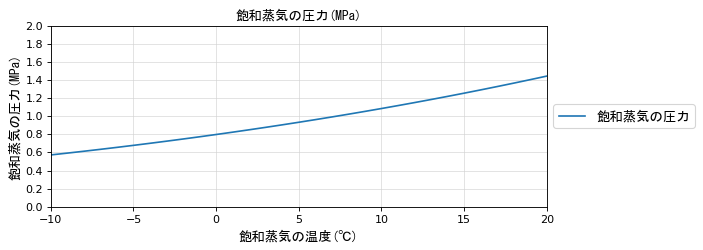

In [17]:
# 出力結果
plt.figure(figsize = (8, 3), dpi=80 )
plt.subplot2grid((1, 1), (0, 0))
plt.title('飽和蒸気の圧力(MPa)', fontdict={'fontproperties':fp})

x_values =[x for x in range(-10, 25, 1)]
y_values = [f_P_sgas(theta) for theta in x_values]
plt.plot(x_values, y_values, label ='飽和蒸気の圧力' )
        
ax=plt.gca()
ax.set_xlabel('飽和蒸気の温度(℃)', fontdict={'fontproperties':fp})
ax.set_xticks([x for x in range(-10, 25, 5)], minor=False)
ax.set_xbound(lower=-10, upper=20)

ax.set_ylabel('飽和蒸気の圧力(MPa)', fontdict={'fontproperties':fp})
ax.set_yticks(np.arange(0, 2.5, 0.2), minor=False)
ax.set_ybound(lower=0, upper=2)

ax.grid(which='major', color='lightgray', alpha=0.7, linestyle='-')     
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), borderaxespad=0.5, frameon=True, prop=fp)

plt.show()

#### D.8.2　過熱蒸気に関する関数

<p style="text-indent:2em">圧縮機吸込領域において過熱蒸気の圧力と温度から比エンタルピーを求める関数：</p> 
$$ 
\begin{align*}
    f_{H,gas,comp,{\textit in}} \left( P, \: \theta \right) = &- 1.00110355 \times 10^{-1} \times P^{3} - 1.184450639 \times 10 \times P^{2} \\
    &- 2.052740252 \times 10^{2} \times P + 3.20391 \times 10^{-6} \times \left( \theta + 273.15 \right)^{3} \\
    &- 2.24685 \times 10^{-3} \times \left( \theta + 273.15 \right)^{2} + 1.279436909 \times \left( \theta + 273.15 \right) \\
    &+ 3.1271238 \times 10^{-2} \times P^{2} \times \left( \theta + 273.15 \right) \\
    &- 1.415359 \times 10^{-3} \times P \times \left( \theta + 273.15 \right)^{2} \\
    &+ 1.05553912 \times P \times \left( \theta + 273.15 \right) + 1.949505039 \times 10^{2}
\end{align*}  
$$

<div style="text-align: right;"> (15) </div>

ここで、  

$f_{H,gas,comp,{\textit in}}$：過熱蒸気の比エンタルピー(kJ/kg)        
$P$：過熱蒸気の圧力(MPa)    
$\theta$：過熱蒸気の温度(℃)   

である。

In [18]:
def f_H_gas_comp_in(P, theta):
    '''圧縮機吸込領域における過熱蒸気の比エンタルピー(kJ/kg)を求める。'''
    
    a30 = -1.00110355  * 10**(-1)
    a20 = -1.184450639 * 10
    a10 = -2.052740252 * 10**(2)
    a03 =  3.20391     * 10**(-6)
    a02 = -2.24685     * 10**(-3)
    a01 =  1.279436909
    a21 =  3.1271238   * 10**(-2)
    a12 = -1.415359    * 10**(-3)
    a11 =  1.05553912
    a00 =  1.949505039 * 10**(2)
    
    T = theta + 273.15
    
    return    a30 * P**3 * T**0 + a20 * P**2 * T**0 + a10 * P**1 * T**0 \
            + a03 * P**0 * T**3 + a02 * P**0 * T**2 + a01 * P**0 * T**1 \
            + a21 * P**2 * T**1 + a12 * P**1 * T**2 \
            + a11 * P**1 * T**1 + a00 * P**0 * T**0

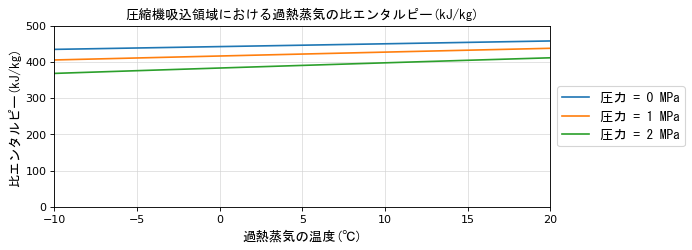

In [19]:
# 出力結果
plt.figure(figsize = (8, 3), dpi=80 )
plt.subplot2grid((1, 1), (0, 0))
plt.title('圧縮機吸込領域における過熱蒸気の比エンタルピー(kJ/kg)', fontdict={'fontproperties':fp})

for i,P in enumerate([z for z in range(0, 3, 1)]):
    x_values = [x for x in range(-10, 25, 1)]
    y_values = [f_H_gas_comp_in(P, theta) for theta in x_values]
    plt.plot(x_values, y_values, label='圧力 = '+str(P)+' MPa')
        
ax=plt.gca()
ax.set_xlabel('過熱蒸気の温度(℃)', fontdict={'fontproperties':fp})
ax.set_xticks([x for x in range(-10, 25, 5)], minor=False)
ax.set_xbound(lower=-10, upper=20)

ax.set_ylabel('比エンタルピー(kJ/kg)', fontdict={'fontproperties':fp})
ax.set_yticks([y for y in range(0, 600, 100)], minor=False)
ax.set_ybound(lower=0, upper=500)

ax.grid(which='major', color='lightgray', alpha=0.7, linestyle='-')     
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), borderaxespad=0.5, frameon=True, prop=fp)

plt.show()

<p style="text-indent:2em">圧縮機吐出領域において過熱蒸気の圧力と比エントロピーから比エンタルピーを求める関数：</p> 
$$ 
\begin{align*}
    f_{H,gas,comp,out} \left( P, \: S \right) = &- 1.869892835947070 \times 10^{-1} \times P^{4} + 8.223224182177200 \times 10^{-1} \times P^{3} \\
    &+ 4.124595239531860 \times P^{2} - 8.346302788803210 \times 10 \times P \\
    &- 1.016388214044490 \times 10^{2} \times S^{4} + 8.652428629143880 \times 10^{2} \times S^{3} \\
    &- 2.574830800631310 \times 10^{3} \times S^{2} + 3.462049327009730 \times 10^{3} \times S \\
    &+ 9.209837906396910 \times 10^{-1} \times P^{3} \times S\\
    &- 5.163305566700450 \times 10^{-1} \times P^{2} \times S^{2} \\
    &+ 4.076727767130210 \times P \times S^{3} - 8.967168786520070 \times P^{2} \times S \\
    &- 2.062021416757910 \times 10 \times P \times S^{2} + 9.510257675728610 \times 10 \times P \times S \\
    &- 1.476914346214130 \times 10^{3}
\end{align*}  
$$

<div style="text-align: right;"> (16) </div>

ここで、  

$f_{H,gas,comp,out}$：過熱蒸気の比エンタルピー(kJ/kg)        
$P$：過熱蒸気の圧力(MPa)    
$S$：過熱蒸気の比エントロピー(kJ/(kg・K))       

である。

In [20]:
def f_H_gas_comp_out(P, S):
    '''圧縮機吸込領域における過熱蒸気の比エンタルピー(kJ/kg)を求める。'''
    
    a40 = -1.869892835947070 * 10**(-1)
    a30 =  8.223224182177200 * 10**(-1)
    a20 =  4.124595239531860
    a10 = -8.346302788803210 * 10
    a04 = -1.016388214044490 * 10**(2)
    a03 =  8.652428629143880 * 10**(2)
    a02 = -2.574830800631310 * 10**(3)
    a01 =  3.462049327009730 * 10**(3)
    a31 =  9.209837906396910 * 10**(-1)
    a22 = -5.163305566700450 * 10**(-1)
    a13 =  4.076727767130210
    a21 = -8.967168786520070 
    a12 = -2.062021416757910 * 10
    a11 =  9.510257675728610 * 10
    a00 = -1.476914346214130 * 10**(3)
    
    return    a40 * P**4 * S**0 + a30 * P**3 * S**0 + a20 * P**2 * S**0 + a10 * P**1 * S**0 \
            + a04 * P**0 * S**4 + a03 * P**0 * S**3 + a02 * P**0 * S**2 + a01 * P**0 * S**1 \
            + a31 * P**3 * S**1 + a22 * P**2 * S**2 + a13 * P**1 * S**3 \
            + a21 * P**2 * S**1 + a12 * P**1 * S**2 \
            + a11 * P**1 * S**1 + a00 * P**0 * S**0

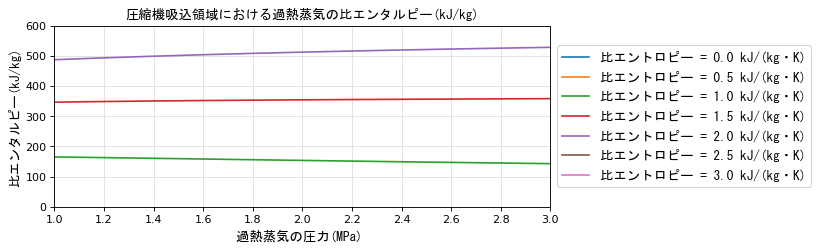

In [21]:
# 出力結果
plt.figure(figsize = (8, 3), dpi=80 )
plt.subplot2grid((1, 1), (0, 0))
plt.title('圧縮機吸込領域における過熱蒸気の比エンタルピー(kJ/kg)', fontdict={'fontproperties':fp})

for i,S in enumerate(np.arange(0, 3.5, 0.5)):
    x_values = np.arange(1.0, 4.0, 0.2)
    y_values = [f_H_gas_comp_out(P, S) for P in x_values]
    plt.plot(x_values, y_values, label='比エントロピー = '+str(S)+' kJ/(kg・K)')
        
ax=plt.gca()
ax.set_xlabel('過熱蒸気の圧力(MPa) ', fontdict={'fontproperties':fp})
ax.set_xticks(np.arange(1.0, 4.0, 0.2), minor=False)
ax.set_xbound(lower=1, upper=3)

ax.set_ylabel('比エンタルピー(kJ/kg)', fontdict={'fontproperties':fp})
ax.set_yticks(np.arange(0, 1000, 100), minor=False)
ax.set_ybound(lower=0, upper=600)

ax.grid(which='major', color='lightgray', alpha=0.7, linestyle='-')     
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), borderaxespad=0.5, frameon=True, prop=fp)

plt.show()

<p style="text-indent:2em">過熱蒸気の圧力と比エンタルピーから比エントロピーを求める関数：</p> 
$$ 
\begin{align*}
    f_{S,gas} \left( P, \: h \right) = & 5.823109493752840 \times 10^{-2} \times P^{4} - 3.309666523931270 \times 10^{-1} \times P^{3} \\
    &+ 7.700179914440890 \times 10^{-1} \times P^{2} - 1.311726004718660 \times P \\
    &+ 1.521486605815750 \times 10^{-9} \times h^{4} - 2.703698863404160 \times 10^{-6} \times h^{3} \\
    &+ 1.793443775071770 \times 10^{-3} \times h^{2} - 5.227303746767450 \times 10^{-1} \times h \\
    &+ 1.100368875131490 \times 10^{-4} \times P^{3} \times h + 5.076769807083600 \times 10^{-7} \times P^{2} \times h^{2} \\
    &+ 1.202580329499520 \times 10^{-8}\times P \times h^{3} - 7.278049214744230 \times 10^{-4} \times P^{2} \times h \\
    &- 1.449198550965620 \times 10^{-5} \times P \times h^{2} + 5.716086851760640 \times 10^{-3} \times P \times h \\
    &+ 5.818448621582900 \times 10
\end{align*}  
$$

<div style="text-align: right;"> (17) </div>

ここで、  

$f_{S,gas}$：過熱蒸気の比エントロピー(kJ/(kg・K))         
$P$：過熱蒸気の圧力(MPa)    
$h$：過熱蒸気の比エンタルピー(kJ/kg)       

である。

In [22]:
def f_S_gas(P, h):
    '''過熱蒸気の比エントロピー(kJ/(kg・K))を求める。'''
    
    a40 =  5.823109493752840 * 10**(-2)
    a30 = -3.309666523931270 * 10**(-1)
    a20 =  7.700179914440890 * 10**(-1)
    a10 = -1.311726004718660
    a04 =  1.521486605815750 * 10**(-9)
    a03 = -2.703698863404160 * 10**(-6)
    a02 =  1.793443775071770 * 10**(-3)
    a01 = -5.227303746767450 * 10**(-1)
    a31 =  1.100368875131490 * 10**(-4)
    a22 =  5.076769807083600 * 10**(-7)
    a13 =  1.202580329499520 * 10**(-8)
    a21 = -7.278049214744230 * 10**(-4)
    a12 = -1.449198550965620 * 10**(-5)
    a11 =  5.716086851760640 * 10**(-3)
    a00 =  5.818448621582900 * 10
    
    return    a40 * P**4 * h**0 + a30 * P**3 * h**0 + a20 * P**2 * h**0 + a10 * P**1 * h**0 \
            + a04 * P**0 * h**4 + a03 * P**0 * h**3 + a02 * P**0 * h**2 + a01 * P**0 * h**1 \
            + a31 * P**3 * h**1 + a22 * P**2 * h**2 + a13 * P**1 * h**3 \
            + a21 * P**2 * h**1 + a12 * P**1 * h**2 \
            + a11 * P**1 * h**1 + a00 * P**0 * h**0

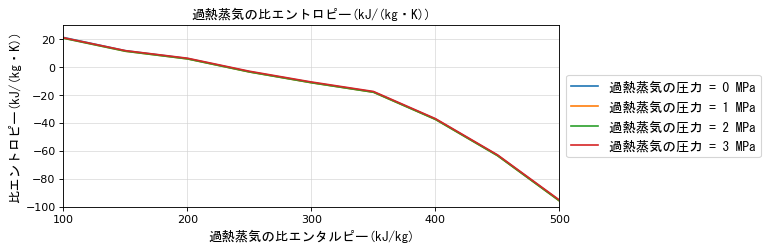

In [23]:
# 出力結果
plt.figure(figsize = (8, 3), dpi=80 )
plt.subplot2grid((1, 1), (0, 0))
plt.title('過熱蒸気の比エントロピー(kJ/(kg・K))', fontdict={'fontproperties':fp})

for i,P in enumerate(np.arange(0, 4, 1)):
    x_values = np.arange(100, 700, 50)
    y_values = [f_S_gas(P, h) for h in x_values]
    plt.plot(x_values, y_values, label='過熱蒸気の圧力 = '+str(P)+' MPa')
        
ax=plt.gca()
ax.set_xlabel('過熱蒸気の比エンタルピー(kJ/kg)', fontdict={'fontproperties':fp})
ax.set_xticks(np.arange(100, 600, 100), minor=False)
ax.set_xbound(lower=100, upper=500)

ax.set_ylabel('比エントロピー(kJ/(kg・K))', fontdict={'fontproperties':fp})
ax.set_yticks(np.arange(-1000, 100, 20), minor=False)
ax.set_ybound(lower=-100, upper=30)

ax.grid(which='major', color='lightgray', alpha=0.7, linestyle='-')     
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), borderaxespad=0.5, frameon=True, prop=fp)

plt.show()

#### D.8.3　過冷却液に関する関数

<p style="text-indent:2em">圧縮機吸込領域において過熱蒸気の圧力と温度から比エンタルピーを求める関数：</p> 
$$ 
\begin{align*}
    f_{H,liq} \left( P, \: \theta \right) = & 1.7902915 \times 10^{-2} \times P^{3} + 7.96830322 \times 10^{-1} \times P^{2} \\
    &+ 5.985874958 \times 10 \times P + 0 \times \left( \theta + 273.15 \right)^{3} \\
    &+ 9.86677 \times 10^{-4} \times \left( \theta + 273.15 \right)^{2} + 9.8051677\times 10^{-1} \left( \theta + 273.15 \right) \\
    &- 3.58645 \times 10^{-3} \times P^{2} \times \left( \theta + 273.15 \right) + 8.23122 \times 10^{-4} \times P \times \left( \theta + 273.15 \right) ^{2}\\
    &- 4.42639115 \times 10^{-1} \times P \times \left( \theta + 273.15 \right) - 1.415490404 \times 10^{2}
\end{align*}  
$$

<div style="text-align: right;"> (18) </div>

ここで、  

$f_{H,liq}$：過冷却液の比エンタルピー(kJ/kg)        
$P$：過冷却液の圧力(MPa)    
$\theta$：過冷却液の温度(℃)   

である。

In [24]:
def f_H_liq(P, theta):
    '''圧縮機吸込領域における過冷却液の比エンタルピー(kJ/kg)を求める。'''
    
    a30 =  1.7902915   * 10**(-2)
    a20 =  7.96830322  * 10**(-1)
    a10 =  5.985874958 * 10
    a03 =  0
    a02 =  9.86677     * 10**(-4)
    a01 =  9.8051677   * 10**(-1)
    a21 = -3.58645     * 10**(-3)
    a12 =  8.23122     * 10**(-4)
    a11 = -4.42639115  * 10**(-1)
    a00 = -1.415490404 * 10**(2)
    
    T = theta + 273.15
    
    return    a30 * P**3 * T**0 + a20 * P**2 * T**0 + a10 * P**1 * T**0 \
            + a03 * P**0 * T**3 + a02 * P**0 * T**2 + a01 * P**0 * T**1 \
            + a21 * P**2 * T**1 + a12 * P**1 * T**2 \
            + a11 * P**1 * T**1 + a00 * P**0 * T**0

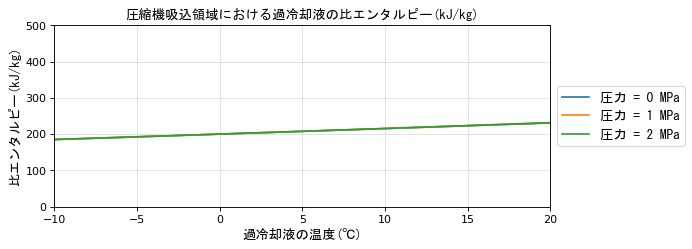

In [25]:
# 出力結果
plt.figure(figsize = (8, 3), dpi=80 )
plt.subplot2grid((1, 1), (0, 0))
plt.title('圧縮機吸込領域における過冷却液の比エンタルピー(kJ/kg)', fontdict={'fontproperties':fp})

for i,P in enumerate([z for z in range(0, 3, 1)]):
    x_values =[x for x in range(-10, 25, 1)]
    y_values = [f_H_liq(P, theta) for theta in x_values]
    plt.plot(x_values, y_values, label='圧力 = '+str(P)+' MPa')
        
ax=plt.gca()
ax.set_xlabel('過冷却液の温度(℃)', fontdict={'fontproperties':fp})
ax.set_xticks([x for x in range(-10, 25, 5)], minor=False)
ax.set_xbound(lower=-10, upper=20)

ax.set_ylabel('比エンタルピー(kJ/kg)', fontdict={'fontproperties':fp})
ax.set_yticks([y for y in range(0, 600, 100)], minor=False)
ax.set_ybound(lower=0, upper=500)

ax.grid(which='major', color='lightgray', alpha=0.7, linestyle='-')     
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), borderaxespad=0.5, frameon=True, prop=fp)

plt.show()

Example (Heating):

In [26]:
# 外気温度
_theta_ex = 0
# 凝縮温度
_theta_ref_cnd = 40

In [27]:
# 蒸発温度
_theta_ref_evp = _theta_ex - (0.100 * _theta_ref_cnd + 2.95)
_theta_ref_evp

-6.95

In [28]:
# 過冷却度
_theta_ref_SC = -(0.245 * _theta_ref_cnd - 1.72)
_theta_ref_SC

-8.08

In [29]:
# 過熱度
_theta_ref_SH = 4.49 - 0.036 * _theta_ref_cnd
_theta_ref_SH

3.0500000000000003

In [30]:
# 凝縮圧力
_P_ref_cnd = P_ref_cnd(_theta_ref_cnd)
_P_ref_cnd

2.418608624814519

In [31]:
# 蒸発圧力
_P_ref_evp = P_ref_evp(_theta_ref_evp)
_P_ref_evp

0.6354972097551437

In [32]:
# 凝縮器出口温度
_theta_ref_cnd_out = theta_ref_cnd_out(_theta_ref_cnd, _theta_ref_SC)
_theta_ref_cnd_out

48.08

In [33]:
# 凝縮器出口比エンタルピー
_h_ref_cnd_out = f_H_liq(_P_ref_cnd, _theta_ref_cnd_out)
_h_ref_cnd_out

279.71607172856056

In [34]:
# 圧縮機吸込温度
_theta_ref_comp_in = theta_ref_comp_in(_theta_ref_evp, _theta_ref_SH) 
_theta_ref_comp_in

-3.9

In [35]:
# 圧縮機吸込圧力
_P_ref_comp_in = P_ref_comp_in(_P_ref_evp)
_P_ref_comp_in 

0.6354972097551437

In [36]:
# 圧縮機吸込比エンタルピー
_h_ref_comp_in =f_H_gas_comp_in(_P_ref_comp_in, _theta_ref_comp_in)
_h_ref_comp_in

422.63504424252136

In [37]:
# 圧縮機吸込比エントロピー
_S_ref_comp_in = f_S_gas(_P_ref_comp_in, _h_ref_comp_in)
_S_ref_comp_in

1.8371766689820817

In [38]:
# 圧縮機吐出比エントロピー
_S_ref_comp_out = S_ref_comp_out(_S_ref_comp_in)
_S_ref_comp_out

1.8371766689820817

In [39]:
# 圧縮機吐出圧力
_P_ref_comp_out = P_ref_comp_out(_P_ref_cnd)
_P_ref_comp_out

2.418608624814519

In [40]:
# 圧縮機吐出比エンタルピー
_h_ref_comp_out = f_H_gas_comp_out(_P_ref_comp_out, _S_ref_comp_out)
_h_ref_comp_out

460.51220412380644

In [41]:
# 暖房の理論効率
_e_ref_H_th = e_ref_H_th(_h_ref_comp_in, _h_ref_comp_out, _h_ref_cnd_out)
_e_ref_H_th 

4.773223044227674

In [42]:
def calc_e_ref_H_th(_theta_ref_evp, _theta_ref_cnd, _theta_ref_SC, _theta_ref_SH):
    '''暖房の理論効率(-)を計算する。'''
    # _theta_ref_evp：蒸発温度(℃)
    # _theta_ref_cnd：凝縮温度(℃)
    # _theta_ref_SC：過冷却度(℃)
    # _theta_ref_SH：過熱度(℃)
  
    # 凝縮圧力(MPa)
    _P_ref_cnd = P_ref_cnd(_theta_ref_cnd)
    # 蒸発圧力(MPa)
    _P_ref_evp = P_ref_evp(_theta_ref_evp)
    
    # 凝縮器出口温度(℃)
    _theta_ref_cnd_out = theta_ref_cnd_out(_theta_ref_cnd, _theta_ref_SC)
    # 凝縮器出口比エンタルピー(kJ/kg)
    _h_ref_cnd_out = f_H_liq(_P_ref_cnd, _theta_ref_cnd_out)
    
    # 圧縮機吸込温度(℃)
    _theta_ref_comp_in = theta_ref_comp_in(_theta_ref_evp, _theta_ref_SH) 
    # 圧縮機吸込圧力(MPa)
    _P_ref_comp_in = P_ref_comp_in(_P_ref_evp)
    # 圧縮機吸込比エンタルピー(kJ/kg)
    _h_ref_comp_in =f_H_gas_comp_in(_P_ref_comp_in, _theta_ref_comp_in)
    # 圧縮機吸込比エントロピー(kJ/(kg・K))
    _S_ref_comp_in = f_S_gas(_P_ref_comp_in, _h_ref_comp_in)
    
    # 圧縮機吐出比エントロピー(kJ/(kg・K))
    _S_ref_comp_out = S_ref_comp_out(_S_ref_comp_in)
    # 圧縮機吐出圧力(MPa)
    _P_ref_comp_out = P_ref_comp_out(_P_ref_cnd)
    # 圧縮機吐出比エンタルピー(kJ/kg)
    _h_ref_comp_out = f_H_gas_comp_out(_P_ref_comp_out, _S_ref_comp_out)
    
    # 暖房の理論効率(-)
    _e_ref_H_th = e_ref_H_th(_h_ref_comp_in, _h_ref_comp_out, _h_ref_cnd_out)
    
    return _e_ref_H_th

In [43]:
calc_e_ref_H_th(_theta_ref_evp, _theta_ref_cnd, _theta_ref_SC, _theta_ref_SH)

4.773223044227674

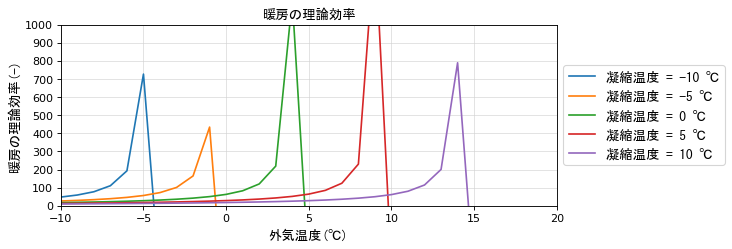

In [44]:
# 出力結果
plt.figure(figsize = (8, 3), dpi=80 )
plt.subplot2grid((1, 1), (0, 0))
plt.title('暖房の理論効率', fontdict={'fontproperties':fp})

for i,theta_cnd in enumerate([z for z in range(-10, 15, 5)]):
    x_values =[x for x in range(-10, 20, 1)]
    y_values = [calc_e_ref_H_th(theta_ex - (0.100 * theta_cnd + 2.95), 
                                theta_cnd, 
                                -(0.245 * theta_cnd - 1.72),
                                4.49 - 0.036 * theta_cnd) for theta_ex in x_values]
    plt.plot(x_values, y_values, label='凝縮温度 = '+str(theta_cnd)+' ℃')
        
ax=plt.gca()
ax.set_xlabel('外気温度(℃)', fontdict={'fontproperties':fp})
ax.set_xticks([x for x in range(-10, 25, 5)], minor=False)
ax.set_xbound(lower=-10, upper=20)

ax.set_ylabel('暖房の理論効率(-)', fontdict={'fontproperties':fp})
ax.set_yticks([y for y in range(0, 1100, 100)], minor=False)
ax.set_ybound(lower=0, upper=1000)

ax.grid(which='major', color='lightgray', alpha=0.7, linestyle='-')     
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), borderaxespad=0.5, frameon=True, prop=fp)

plt.show()

Example (Cooling):

In [45]:
# 外気温度
_theta_ex = 30
# 蒸発温度
_theta_ref_evp = 40

In [46]:
# 凝縮温度
_theta_ref_cnd = _theta_ref_evp + 27.4 - 1.35 * _theta_ref_evp
_theta_ref_cnd

13.400000000000006

In [47]:
# 過冷却度
_theta_ref_SC = 0.772 * _theta_ref_cnd - 25.6
_theta_ref_SC

-15.255199999999997

In [48]:
# 過熱度
_theta_ref_SH = 0.194 * _theta_ref_cnd - 3.86
_theta_ref_SH

-1.2603999999999989

In [49]:
# 凝縮圧力
_P_ref_cnd = P_ref_cnd(_theta_ref_cnd)
_P_ref_cnd

1.1980347769573503

In [50]:
# 蒸発圧力
_P_ref_evp = P_ref_evp(_theta_ref_evp)
_P_ref_evp

2.418608624814519

In [51]:
# 凝縮器出口温度
_theta_ref_cnd_out = theta_ref_cnd_out(_theta_ref_cnd, _theta_ref_SC)
_theta_ref_cnd_out

28.6552

In [52]:
# 凝縮器出口比エンタルピー
_h_ref_cnd_out = f_H_liq(_P_ref_cnd, _theta_ref_cnd_out)
_h_ref_cnd_out

245.35910619978605

In [53]:
# 蒸発器入口比エンタルピー
_h_ref_evp_in = h_ref_evp_in(_h_ref_cnd_out)
_h_ref_evp_in 

245.35910619978605

In [54]:
# 圧縮機吸込温度
_theta_ref_comp_in = theta_ref_comp_in(_theta_ref_evp, _theta_ref_SH) 
_theta_ref_comp_in

38.7396

In [55]:
# 圧縮機吸込圧力
_P_ref_comp_in = P_ref_comp_in(_P_ref_evp)
_P_ref_comp_in 

2.418608624814519

In [56]:
# 圧縮機吸込比エンタルピー
_h_ref_comp_in =f_H_gas_comp_in(_P_ref_comp_in, _theta_ref_comp_in)
_h_ref_comp_in

425.74925303947106

In [57]:
# 圧縮機吸込比エントロピー
_S_ref_comp_in = f_S_gas(_P_ref_comp_in, _h_ref_comp_in)
_S_ref_comp_in

1.8633094253424858

In [58]:
# 圧縮機吐出比エントロピー
_S_ref_comp_out = S_ref_comp_out(_S_ref_comp_in)
_S_ref_comp_out

1.8633094253424858

In [59]:
# 圧縮機吐出圧力
_P_ref_comp_out = P_ref_comp_out(_P_ref_cnd)
_P_ref_comp_out

1.1980347769573503

In [60]:
# 圧縮機吐出比エンタルピー
_h_ref_comp_out = f_H_gas_comp_out(_P_ref_comp_out, _S_ref_comp_out)
_h_ref_comp_out

448.1280405079308

In [61]:
# 冷房の理論効率
_e_ref_C_th = e_ref_C_th(_h_ref_comp_in, _h_ref_comp_out, _h_ref_evp_in )
_e_ref_C_th 

8.060765003194373

In [64]:
def calc_e_ref_C_th(_theta_ref_evp, _theta_ref_cnd, _theta_ref_SC, _theta_ref_SH):
    '''冷房の理論効率(-)を計算する。'''
    # _theta_ref_evp：蒸発温度(℃)
    # _theta_ref_cnd：凝縮温度(℃)
    # _theta_ref_SC：過冷却度(℃)
    # _theta_ref_SH：過熱度(℃)
  
    # 凝縮圧力(MPa)
    _P_ref_cnd = P_ref_cnd(_theta_ref_cnd)
    # 蒸発圧力(MPa)
    _P_ref_evp = P_ref_evp(_theta_ref_evp)
    
    # 凝縮器出口温度(℃)
    _theta_ref_cnd_out = theta_ref_cnd_out(_theta_ref_cnd, _theta_ref_SC)
    # 凝縮器出口比エンタルピー(kJ/kg)
    _h_ref_cnd_out = f_H_liq(_P_ref_cnd, _theta_ref_cnd_out)
    
    # 蒸発器入口比エンタルピー(kJ/kg)
    _h_ref_evp_in = h_ref_evp_in(_h_ref_cnd_out) 
    
    # 圧縮機吸込温度(℃)
    _theta_ref_comp_in = theta_ref_comp_in(_theta_ref_evp, _theta_ref_SH) 
    # 圧縮機吸込圧力(MPa)
    _P_ref_comp_in = P_ref_comp_in(_P_ref_evp)
    # 圧縮機吸込比エンタルピー(kJ/kg)
    _h_ref_comp_in =f_H_gas_comp_in(_P_ref_comp_in, _theta_ref_comp_in)
    # 圧縮機吸込比エントロピー(kJ/(kg・K))
    _S_ref_comp_in = f_S_gas(_P_ref_comp_in, _h_ref_comp_in)
    
    # 圧縮機吐出比エントロピー(kJ/(kg・K))
    _S_ref_comp_out = S_ref_comp_out(_S_ref_comp_in)
    # 圧縮機吐出圧力(MPa)
    _P_ref_comp_out = P_ref_comp_out(_P_ref_cnd)
    # 圧縮機吐出比エンタルピー(kJ/kg)
    _h_ref_comp_out = f_H_gas_comp_out(_P_ref_comp_out, _S_ref_comp_out)
    
    # 冷房の理論効率(-)
    _e_ref_C_th = e_ref_C_th(_h_ref_comp_in, _h_ref_comp_out, _h_ref_cnd_out)
    
    return _e_ref_C_th

In [65]:
calc_e_ref_C_th(_theta_ref_evp, _theta_ref_cnd, _theta_ref_SC, _theta_ref_SH)

8.060765003194373

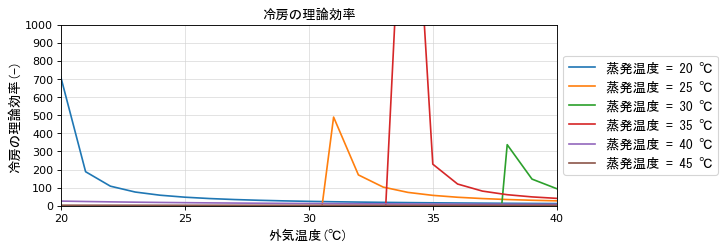

In [66]:
# 出力結果
plt.figure(figsize = (8, 3), dpi=80 )
plt.subplot2grid((1, 1), (0, 0))
plt.title('冷房の理論効率', fontdict={'fontproperties':fp})

for i,theta_evp in enumerate([z for z in range(20, 50, 5)]):
    x_values =[x for x in range(20, 45, 1)]
    y_values = [calc_e_ref_C_th(theta_evp, 
                                (theta_ex + 27.4 - 1.35 * theta_evp), 
                                (0.772 * (theta_ex + 27.4 - 1.35 * theta_evp) - 25.6),
                                (0.194 * (theta_ex + 27.4 - 1.35 * theta_evp) - 3.86)) for theta_ex in x_values]
    plt.plot(x_values, y_values, label='蒸発温度 = '+str(theta_evp)+' ℃')
        
ax=plt.gca()
ax.set_xlabel('外気温度(℃)', fontdict={'fontproperties':fp})
ax.set_xticks([x for x in range(20, 45, 5)], minor=False)
ax.set_xbound(lower=20, upper=40)

ax.set_ylabel('冷房の理論効率(-)', fontdict={'fontproperties':fp})
ax.set_yticks([y for y in range(0, 1100, 100)], minor=False)
ax.set_ybound(lower=0, upper=1000)

ax.grid(which='major', color='lightgray', alpha=0.7, linestyle='-')     
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), borderaxespad=0.5, frameon=True, prop=fp)

plt.show()